<IPython.core.display.Javascript object>


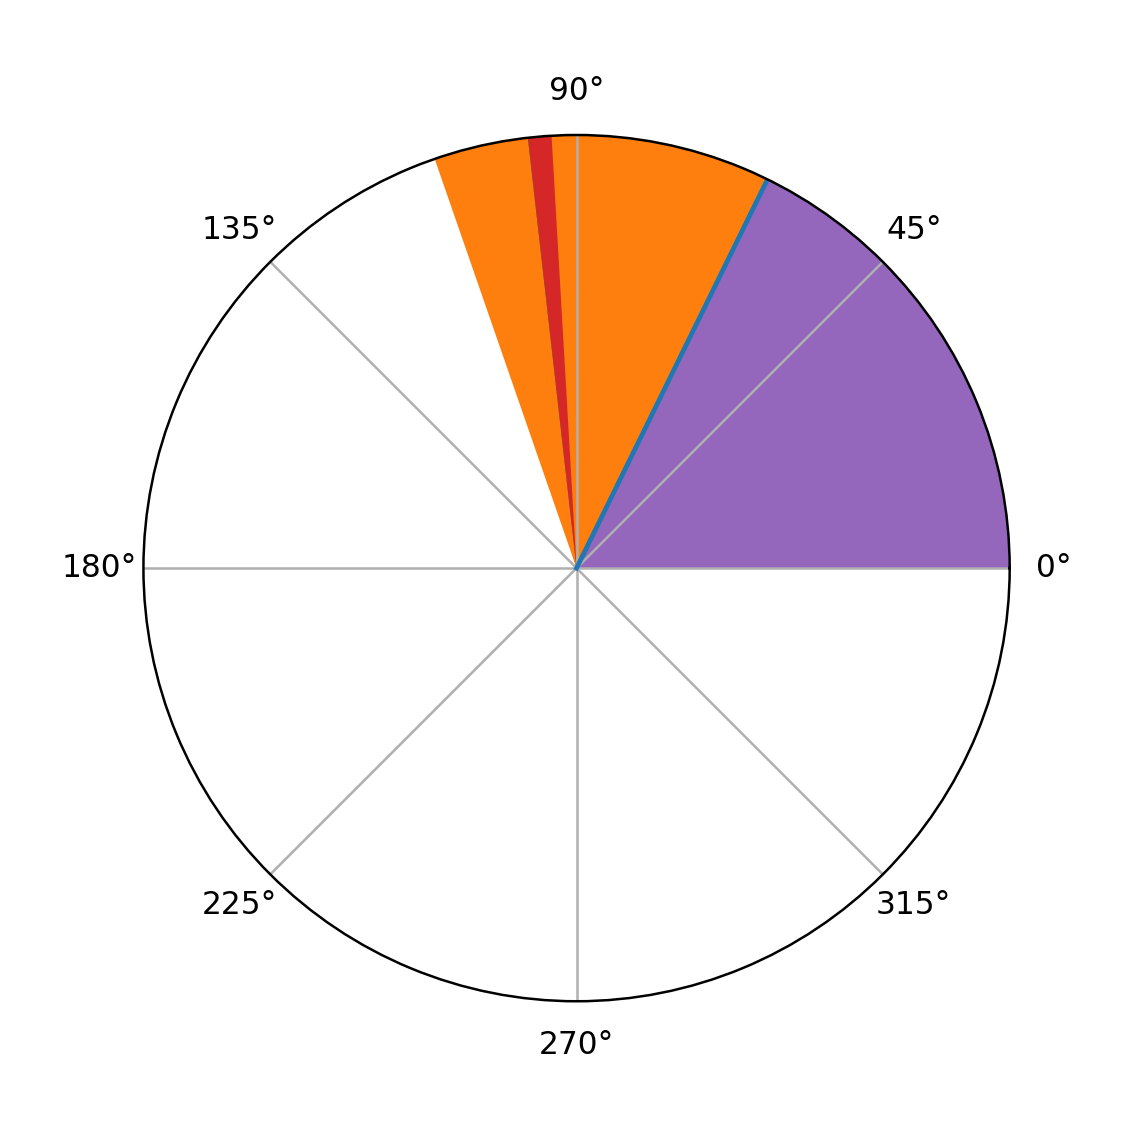

In [98]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib import colors as mcolors
from matplotlib.animation import FuncAnimation
import json



# get audio analysis from Spotify
with open('audio_analysis_onaplain.json') as json_file:
    audio_analysis_data = json.load(json_file)

# get segments
segments = audio_analysis_data['segments']

# get sections
sections = audio_analysis_data['sections']

# extract relevant info from segments
def getSegmentInfo(segments):
    seg_info = {
        'timbres': [],
        'segment_start_times': []
    }
    for segment in segments:
        seg_info['timbres'].append(np.array(segment['timbre']))
        seg_info['segment_start_times'].append(segment['start'])
    return seg_info

# extra relevant info from sections
def getSectionInfo(sections):
    sect_info = {
        'section_start_times': []
    }
    for section in sections:
        sect_info['section_start_times'].append(section['start'])
    return sect_info

# create data objects to pass to getThetas
sect_info = getSectionInfo(sections)
seg_info = getSegmentInfo(segments)

# given the data, produce:
# 1) list of thetas (in radians) between successive timbre vectors 
#    averaged over some timescale or section, 
#    or if neither kw param is set, then the raw list of thetas
def getThetas(segment_info, section_info, bySection=False, timescale_ms=None): 
    
    def getAngle(v1, v2):
        return np.arccos(v1 @ v2 / (np.linalg.norm(v1) * np.linalg.norm(v2)))
    
    thetas = []
    
    for i in range(1, len(segment_info['timbres'])):
        theta = getAngle(np.array(segment_info['timbres'][i]), np.array(segment_info['timbres'][i-1]))
        thetas.append(theta)
    
    thetas = np.array(thetas)
    
    if not bySection and timescale_ms == None:
        return thetas

thetas = getThetas(seg_info, sect_info)

# create animation.  TODO: put this into a class

# create the figure and polar axis
fig = plt.figure()
ax = fig.add_subplot(111, polar=True, label='intermediate') # two rows, one column, first plot
fig.set_size_inches(5, 5, forward=True)
# no y-scale
ax.set_yticks([])
ax.set_ylim(0,1)
y1s = 0
y2s = 2

line, = ax.plot([thetas[0], thetas[0]],[0,2])
count = 0

# def init():
#     return line,

time = 0
frames = []

for angle in thetas:
    frame = ([angle, angle], [0,2])
    frames.append(frame)

time = 0
def gen_frames(time=0):
    while time < len(frames):
        cur_frame = frames[time]
        time += 1
        yield cur_frame
        

def update(data):
    line.set_data(data[0], data[1])
    ax.fill_between([0, data[0][0]], y1s,y2s)
    return line,

ani = FuncAnimation(fig, update, gen_frames, blit=True, repeat=False)

# ani_ax5.fill_between(st_end_theta,y1s,y2s, 
#                                                             offsets=None,visible=True,
#                                                            color='green',animated=True,
#                                                            interpolate=True)

In [ ]:

# degrees to radians
def degToRadians(deg):
    return (2 * np.pi) * (deg / 360)


# ## alternately for the transition maybe just use offsets array -- try it
# ## say offset is 5deg
# segment = [(degToRadians(45),0), (degToRadians(45), 2)]
# # make an array where all the segments are the same, later apply the offsets array
# segments = [segment for i in range(int(45/5))]


# offsets = (degToRadians(5),0)
# print(type(offsets))

# ani_ax = plt.subplot(141, projection='polar', label="using offsets")
# ani_ax.set_rmax(2)
# ani_ax.set_rticks([])
# ani_ax.vlines(degToRadians(45), 0, 2, segments=segments, offsets=offsets)

# line_segments = LineCollection(segments=segments, offsets=offsets, 
#                                linestyle='solid')
# # print(line_segments.properties())
# # the next line in this format causes the graph to be redrawn
# ani_ax.add_collection(line_segments)


# # draw a theta every degree until it reaches the new value
# def animationFrames(old, new):
#     return [degToRadians(x) for x in range(int(old),int(new)+1,5)]

# thetas = animationFrames(45,90)
# print(thetas) 
# print(len(thetas)) 

# ani_ax2 = plt.subplot(142, projection='polar', label="changing theta")
# ani_ax2.set_rmax(2)
# ani_ax2.set_rticks([])
# ani_ax2.vlines(thetas, 0, 2)

# ## now try to make a fill between the 2 final vectors

# st_end_theta = [degToRadians(15), degToRadians(60)]
# y1s = 0
# y2s = 2
# ani_ax3 = plt.subplot(143, projection='polar', label="fill 1")
# # or set ylim to make it fill to the edge... that could be the better what because
# # then only need start and end angles
# ani_ax3.set_yticks([])
# ani_ax3.set_ylim(0,1)
# ani_ax3.fill_between(st_end_theta,y1s,y2s, 
#                                                             offsets=None,visible=True,
#                                                            step='pre',animated=True,
#                                                            interpolate=True)

# # it's smoother if you use more thetas
# thetas_fill = animationFrames(15,60)
# y1s = 0
# y2s = 2
# ani_ax4 = plt.subplot(144, projection='polar', label="fill 2")
# ani_ax4.set_yticks([])
# ani_ax4.fill_between(thetas_fill,y1s,y2s, offsets=None,visible=True,
#                     step='pre',animated=True,interpolate=True, color='green')



# now one big one
st_end_theta = [degToRadians(15), degToRadians(60)]
y1s = 0
y2s = 2
ani_ax5 = plt.subplot(111, projection='polar', label="fill big")
# or set ylim to make it fill to the edge... that could be the better what because
# then only need start and end angles
ani_ax5.set_yticks([])
ani_ax5.set_ylim(0,1)
ani_ax5.fill_between(st_end_theta,y1s,y2s, 
                                                            offsets=None,visible=True,
                                                           color='green',animated=True,
                                                           interpolate=True)




In [ ]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

fig, ax = plt.subplots()
xdata, ydata = [], []
ln, = plt.plot([], [], 'ro')

print(type(ln))

def init():
    ax.set_xlim(0, 2*np.pi)
    ax.set_ylim(-1, 1)
    return ln,

def update(frame):
    xdata.append(frame)
    ydata.append(np.sin(frame))
    ln.set_data(xdata, ydata)
    return ln,



ani = FuncAnimation(fig, update, frames=np.linspace(0, 2*np.pi, 128),
                    init_func=init, blit=True)
plt.show()

sample data from the audio analysis of Can't You Hear Me Knocking

In [ ]:
import json
import matplotlib.pyplot as plt

from matplotlib.collections import LineCollection
from matplotlib import colors as mcolors
import numpy as np

def average(nums):
    return sum(nums) / len(nums)

def radToDegrees(rad):
    return rad * (360 / (2 * np.pi))

with open('audio_analysis_onaplain.json') as json_file:
    data = json.load(json_file)
# data is a python dictionary {}
# print(json.dumps(data, indent=4))

# print(json.dumps(data['track'], indent=4))

# print(json.dumps(data['bars'], indent=4))
# BARS
bars = data['bars']
# print(f'number of bars {len(bars)}')
# print(json.dumps(data['sections'], indent=4))


# SECTIONS
# there are 22 sections in Can't you Hear me Knocking
sections = data['sections']
print(f'number of sections {len(sections)}')
sect_durations = []
for section in sections:
    sect_durations.append(section['duration'])

print(average(sect_durations))
# 19.818181363636366
# Each section is about 2- seconds long


# SEGMENTS
segments = data['segments']
print(f'number of segments {len(segments)}')
# print(json.dumps(segments, indent=4))
# average duration of a segment
seg_durations = []
for segment in segments:
    seg_durations.append(segment['duration'])
print(average(seg_durations))
# 0.2666666666666665
# each segment is about a quarter second long


# TIMBRES
timbres = []
for segment in segments:
    timbres.append(segment['timbre'])
# print(len(timbres))

np_timbres = []
for i in range(len(timbres)):
    np_timbres.append(np.array(timbres[i]))

# THETAS
def getAngle(v1, v2):
    return np.arccos(v1 @ v2 / (np.linalg.norm(v1) * np.linalg.norm(v2)))

thetas = []
thetas_deg = []
for i in range(1,len(timbres)):
    theta = getAngle(np.array(timbres[i]), np.array(timbres[i-1]))
    thetas.append(theta)
    thetas_deg.append(radToDegrees(theta))

# SEGMENT START TIMES
seg_start_times = []
for segment in segments:
    seg_start_times.append(segment['start'])
seg_start_times = np.array(seg_start_times)

# SECTION START TIMES
sect_start_times = []
for section in sections:
    sect_start_times.append(section['start'])
sect_start_times = np.array(sect_start_times)
# print(sect_start_times)


# COLOR MAP
cbn_colors = mcolors.BoundaryNorm(sect_start_times, ncolors=len(sect_start_times))
# print(type(cmap), cmap)

# Are the section start times a subset of segment start times?  - Answer, NO, they are not
section_segment_indices = []
for time in sect_start_times:
    try:
        section_segment_indices.append(seg_start_times.index(time))
    except:
        section_segment_indices.append(0)
# print(section_segment_indices)
    
# print(radToDegrees(np.mean(thetas)))
# 49.2672248628038

ax_0 = plt.subplot(111)
ax_0.hist(thetas_deg, label="some hist")

# ax = plt.subplot(111)
# x1 = np.linspace(1, len(timbres)-1, len(timbres)-1)

# ys = np.array(thetas_deg)
# print(x1.shape, ys.shape)
# #### ax.scatter(x1[900:920],ys[900:920])

ax_2 = plt.subplot(polar=True, label='a way')
# print(f'ax_2 is type: {type(ax_2)}')
fig = plt.gcf()
# print(fig)
# print(f'ax_2 is type: {type(fig)}')
fig.set_size_inches(8, 8, forward=True)
xs = np.array(thetas)
ts = seg_start_times[1:]
rs = np.array([2 for i in thetas])
# colors = seg_start_times[1:]
colors = cbn_colors(seg_start_times[1:])
# print(rs.shape)
# print(ts.shape)


# fig = matplotlib.pyplot.gcf()
# fig.set_size_inches(18.5, 10.5)
# fig.savefig('test2png.png', dpi=100)

ax_2.scatter(xs,ts, c=colors, cmap=plt.get_cmap('tab20'), s=1, alpha=0.75)

# are any of the thetas / anges negative?
# they will all be between 0 and 180 
# because that is the domain of arccos



# TODO: make the animation


# print(sect_start_times[10])


fil_seg_start_times = seg_start_times[seg_start_times < 8.5]
# print(fil_seg_start_times)

# TODO c = ax.scatter(theta, r, c=colors, s=area, cmap='hsv', alpha=0.75)
# TODO get "Average timbres" for sections to see what makes more sense to plot... if anything
# transparency

In [ ]:
# TIMBRES
timbres = []
for segment in segments:
    timbres.append(segment['timbre'])
# print(len(timbres))

np_timbres = []
for i in range(len(timbres)):
    np_timbres.append(np.array(timbres[i]))

# THETAS
def getAngle(v1, v2):
    return np.arccos(v1 @ v2 / (np.linalg.norm(v1) * np.linalg.norm(v2)))

thetas = []
thetas_deg = []
for i in range(1,len(timbres)):
    theta = getAngle(np.array(timbres[i]), np.array(timbres[i-1]))
    thetas.append(theta)
    thetas_deg.append(radToDegrees(theta))

# SEGMENT START TIMES
seg_start_times = []
for segment in segments:
    seg_start_times.append(segment['start'])
seg_start_times = np.array(seg_start_times)

# SECTION START TIMES
sect_start_times = []
for section in sections:
    sect_start_times.append(section['start'])
sect_start_times = np.array(sect_start_times)
# print(sect_start_times)


# list of segment indices in each section
# list of segment indices in each section

segment_by_section = []
prev_sect_time = 0
last_indices_by_section = []

for sect_time in sect_start_times[1:]:
    # do not include the 0th index of seg_start_times, because theta starts from the 1st index (it is a diff)
    this_section = np.where((seg_start_times <= sect_time) & (seg_start_times > prev_sect_time))
    segment_by_section.append(this_section)
    last_index_in_section = this_section[0][-1]
    last_indices_by_section.append(last_index_in_section)
    prev_sect_time = sect_time
    

# print(last_indices_by_section)


# really only need the last entry in each list of indices
# then use that number to slice the thetas array up to that index
thetas_by_section = []
thetas_deg_by_section = []
prev_index = 0

for index in last_indices_by_section:
    this_section = np.array(thetas[prev_index:index])
    this_section_deg = np.array(thetas_deg[prev_index:index])
    thetas_by_section.append(this_section)
    thetas_deg_by_section.append(this_section_deg)
    prev_index = index
    
thetas_by_section = np.array(thetas_by_section)
thetas_deg_by_section = np.array(thetas_deg_by_section)

means_deg_by_section = []
# print(thetas_deg_by_section)
for thetas in thetas_deg_by_section:
    print(len(thetas))
    means_deg_by_section.append(np.mean(thetas))

means_deg_by_section = np.array(means_deg_by_section)

print(means_deg_by_section)

# maybe I'll just chill and get some sleep

 numpy dot products

In [ ]:
# keyDict = {} # dictionary mapping audio analysis key indices to letter keys
# dot product and angles in radians
import numpy as np

u = [0,1,0]
v = [1,0,1]

u = np.array(u, float)
v = np.array(v, float)
a = [3, 4]
norm = np.linalg.norm(a)
print(norm)
d = u @ v
print(d)

def getAngle(v1, v2):
    return np.arccos(v1 @ v2 / (np.linalg.norm(v1) * np.linalg.norm(v2)))

print(getAngle(u,v))


# degrees to radians
def degToRadians(deg):
    return (2 * np.pi) * (deg / 360)

print(degToRadians(90))

def radToDegrees(rad):
    return rad * (360 / (2 * np.pi))

radToDegrees(0.5 *np.pi)